# LOGISTIC REGRESSION
<b> This can be use to solve two type of problems, whether continuous or categorical </b>

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("insurance_data.csv"
                )

In [4]:
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


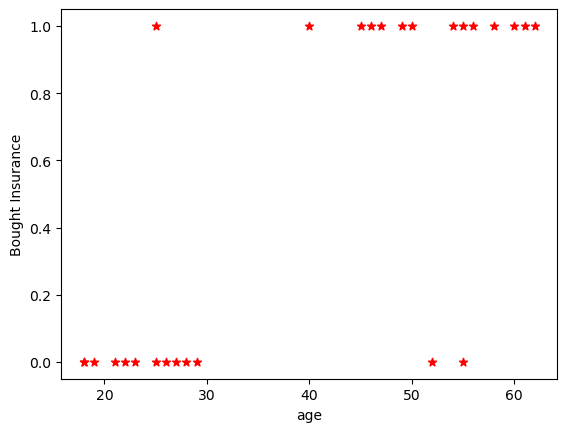

In [8]:
plt.xlabel("age")
plt.ylabel("Bought Insurance")
plt.scatter(df.age, df.bought_insurance, color="red", marker="*")
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(df[["age"]], df[["bought_insurance"]], test_size=0.2)

In [15]:
logr = LogisticRegression()

In [20]:
logr.fit(X_train, y_train)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [22]:
X_test, y_test

(    age
 11   28
 14   49
 4    46
 16   25
 25   54
 21   26,
     bought_insurance
 11                 0
 14                 1
 4                  1
 16                 1
 25                 1
 21                 0)

In [31]:
logr.predict([[28],[49],[46],[25],[54],[26]])

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 1, 0, 1, 0], dtype=int64)

In [33]:
logr.score(X_test, y_test)

0.8333333333333334

### Exercise

Download employee retention dataset from here: https://www.kaggle.com/giripujar/hr-analytics.

    1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
    2.Plot bar charts showing impact of employee salaries on retention
    3.Plot bar charts showing corelation between department and employee retention
    3.Now build logistic regression model using variables that were narrowed down in step 1
    4.Measure the accuracy of the model

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Exploratory Data Analysis and Visualisation

In [5]:
df.columns # Displaying the columns of the dataset

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df.shape

(14999, 10)

In [11]:
df.corr()

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [16]:
df.notnull().count()

satisfaction_level       14999
last_evaluation          14999
number_project           14999
average_montly_hours     14999
time_spend_company       14999
Work_accident            14999
left                     14999
promotion_last_5years    14999
Department               14999
salary                   14999
dtype: int64

In [17]:
df.left.unique()

array([1, 0], dtype=int64)

In [24]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
Department                object
salary                    object
dtype: object

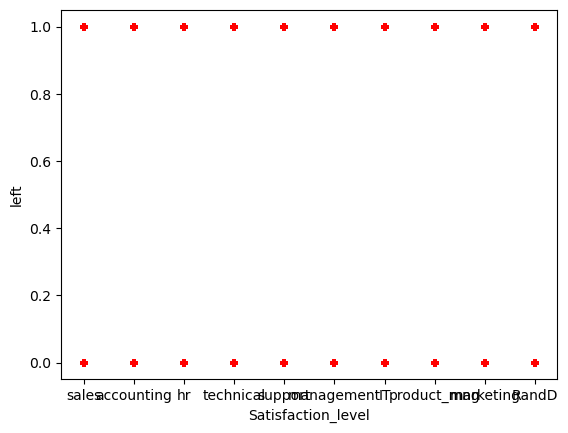

In [30]:
plt.xlabel("Satisfaction_level")
plt.ylabel("left")
plt.scatter(df.Department, df.left, color="red", marker="+")
plt.show()

#### Task 1. 
1.Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)

In [34]:
employees_left = df[df.left==1]
employees_left.shape

(3571, 10)

In [37]:
employees_retained = df[df.left==0]
employees_retained.shape

(11428, 10)

### Average number of employees left and retained

In [38]:
df.groupby("left").mean()

C:\Users\hp\AppData\Local\Temp\ipykernel_8976\189522867.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby("left").mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


1. **Satisfation Level**. the satisfaction level for employees who left the company are low (0.44) compared to those that didnt leave (0.66)
2. **Average Monthly Hours**. Employees with greater average monthly hours that left the company is high (199 vs 207)
3. **promotion last 5years**. Employees with frequent promotion has tendencies of staying than leaving.

<b>Task 2.</b>
<br>
<b>2.Plot bar charts showing impact of employee salaries on retention</b>

<Axes: xlabel='salary'>

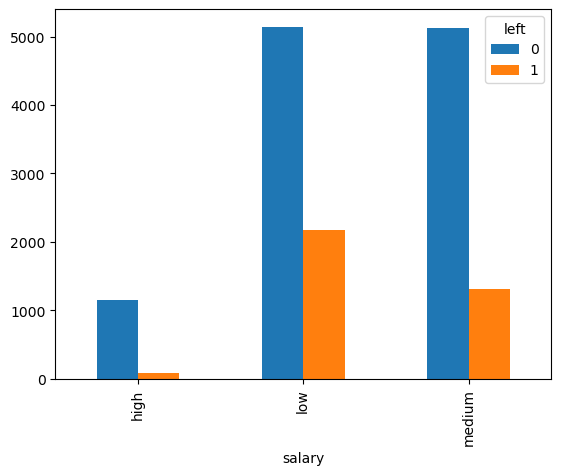

In [39]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

From the above we can observe that employees with high salaries has tendencies of staying

<b>Task 3
<br>
<b>3.Plot bar charts showing corelation between department and employee retention</b>

<Axes: xlabel='Department'>

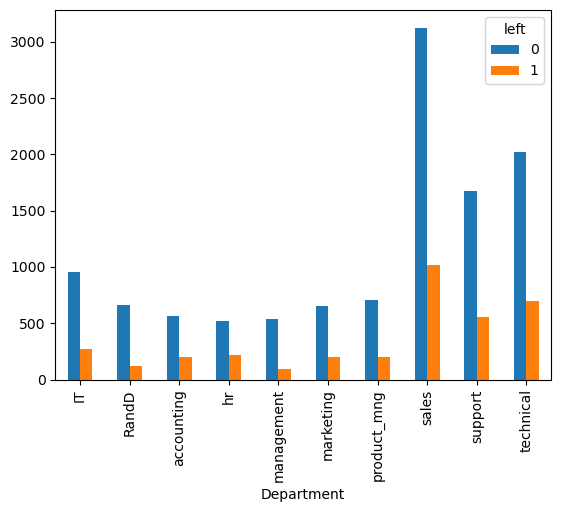

In [40]:
pd.crosstab(df.Department, df.left).plot(kind="bar")

From the Analysis above, the employee in a department is not even up to average of the total number of staffs, therefore department of the employee is really not a determining factor to the attrition of employee and its not relatively close 

### Task 3 Now build logistic regression model using variables that were narrowed down in step 1
### Selection of Important Features for our model
from the analysis, the various features greatly affect employee attrition in the company:
1. **Satisfation Level**
2. **Average Monthly Hours**
3. **promotion last 5years**
4. **Salary**

In [43]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [63]:
df_ = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]

### <b>Preparing the dataframe for our model</b>

<b>Now Converting the Salary to dummy variables</b>

In [64]:
dummies = pd.get_dummies(df_.salary)

add it to the **df_** dataframe

In [65]:
df_ = pd.concat([df_, dummies], axis="columns")

Removing the Salary Column since a dummy variables has been created for it

In [66]:
df_.drop("salary", inplace=True, axis="columns") # the dataset is now ready.

In [67]:
df_

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [68]:
# removing one of the dummy variabe.
df_.drop("high", inplace=True, axis="columns") # the dataset is now ready.

In [69]:
X = df_.values

In [70]:
X

array([[3.80e-01, 1.57e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       [8.00e-01, 2.62e+02, 0.00e+00, 0.00e+00, 1.00e+00],
       [1.10e-01, 2.72e+02, 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [3.70e-01, 1.43e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       [1.10e-01, 2.80e+02, 0.00e+00, 1.00e+00, 0.00e+00],
       [3.70e-01, 1.58e+02, 0.00e+00, 1.00e+00, 0.00e+00]])

In [71]:
y = df.left

Splitting the dataset into train and test dataframe

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [73]:
X_train.shape

(11999, 5)

In [74]:
y_train.shape

(11999,)

In [75]:
# creating the logistic Regression Model object
lrm = LogisticRegression()

In [76]:
#fitting the X and y train set
lrm.fit(X_train, y_train)

LogisticRegression()

### Accuracy of the Model

In [78]:
lrm.score(X_test, y_test) # 78.7 Accuracy

0.7873333333333333